<a href="https://colab.research.google.com/github/M-Imaduddin-A/Bengkel-Koding-DS/blob/main/Soal_UAS_bengkod_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Klasifikasi Data Kualitas Air dan Kelayakan Minum**

__Tulis Nama dan Nim__

Nama :Muhammad Imaduddin Abdurrohim

NIM :A11.2020.13192

Link Dataset :  https://drive.google.com/file/d/1uBQmeOucB1xIg1n0MdgBwCoi3ZJrHZpN/view

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **Import library** yang akan digunakan
    - **Membaca dataset** _penguins_size_
    - **Tampilkan 10 sample** dari dataset
    

In [ ]:
# Import lib yang perlu
# Import lib yang perlu
# @title Import library
import pandas as pd
import re
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# import bisa dilakukan di awal sekaligus atau sebelum fungsi yang dilakukan

In [ ]:
# Download dataset
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/dataset/

/content/drive/My Drive/dataset


In [ ]:
# Load dataset
water_data = pd.read_csv("water_potability.csv")

water_data.head()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Menampilkan data
water_data.info()
# Menampilkan nilai unik
print(water_data.nunique())
# Deskirpsi
print(water_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64
                ph     Hardness     

In [ ]:
# Cek missing values
print("Missing values per column:")
print(water_data.isnull().sum())

Missing values per column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


3. Isi _code-cell_ dibawah dengan kode untuk:
    - **Melihat informasi** pada dataset
    - **Mengecek nilai unik** pada kolom bertipe data *object*
  

In [ ]:
# Imputasi nilai missing dengan mean
water_data.fillna(water_data.mean(), inplace=True)

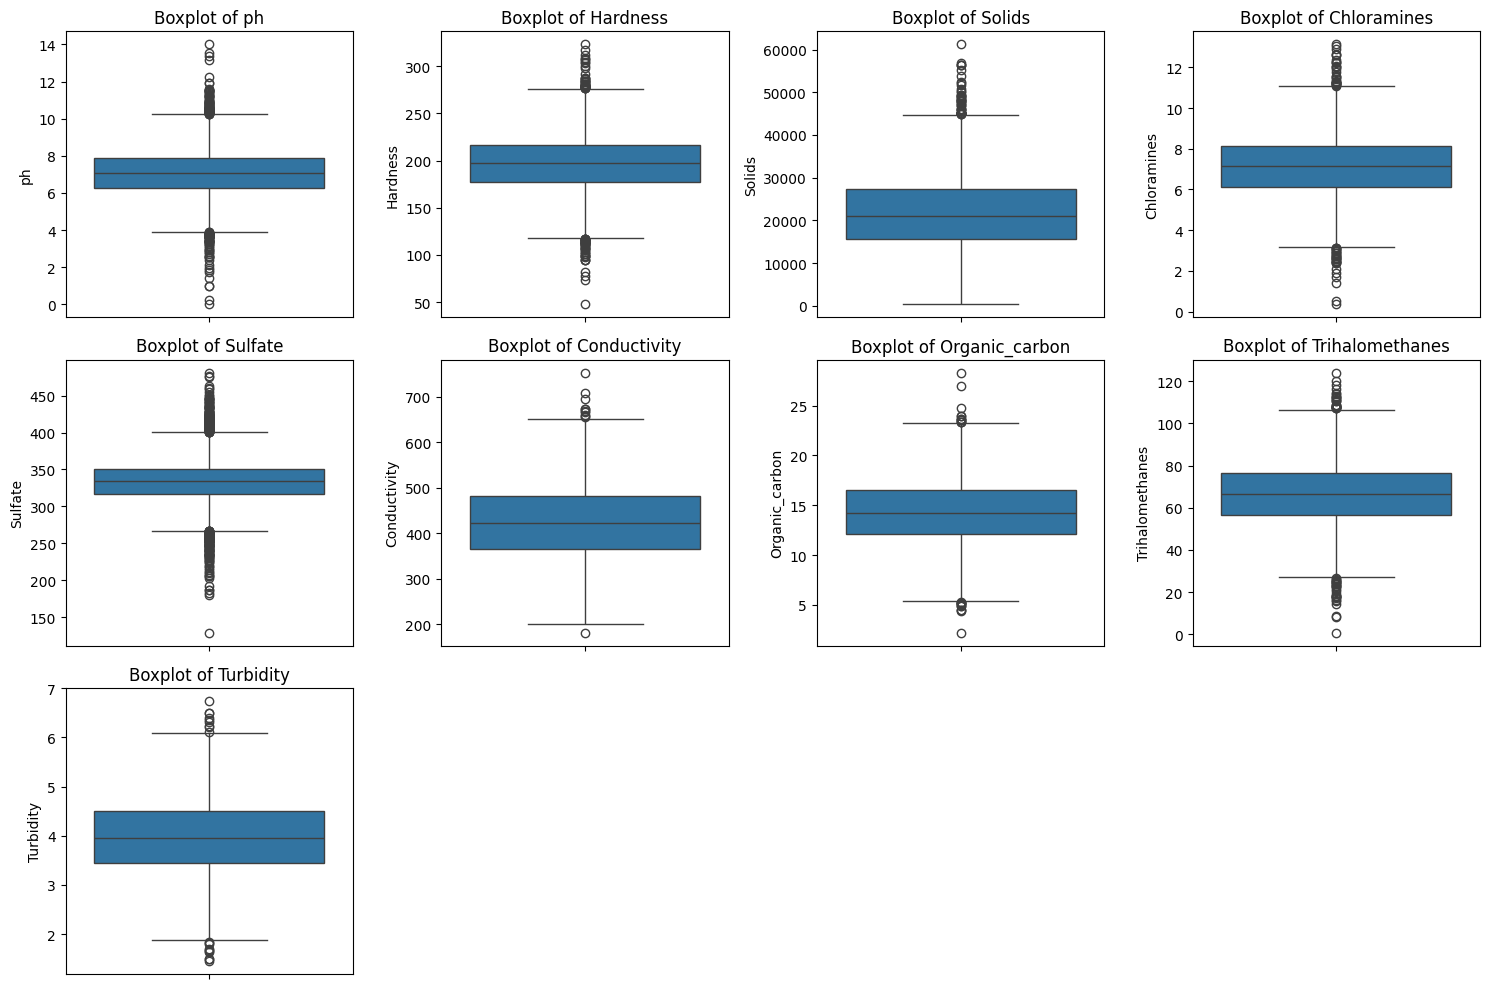

In [ ]:
# Cek outliers menggunakan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(water_data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=water_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

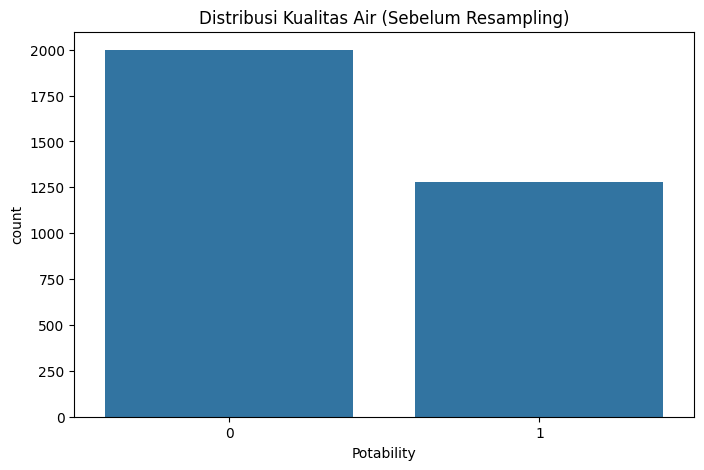

In [ ]:
# Visualisasi distribusi data kualitas air sebelum resampling
plt.figure(figsize=(8, 5))
sns.countplot(x="Potability", data=water_data)
plt.title("Distribusi Kualitas Air (Sebelum Resampling)")
plt.show()


In [ ]:
# Memisahkan fitur dan target
X = water_data[["ph", "Hardness", "Solids", "Chloramines",
                "Sulfate", "Conductivity", "Organic_carbon",
                "Trihalomethanes", "Turbidity"]]

y = water_data["Potability"]

# Menampilkan informasi tentang fitur dan target
print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Fitur (X):
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


Distribusi Potability:
Potability
0    1998
1    1278
Name: count, dtype: int64


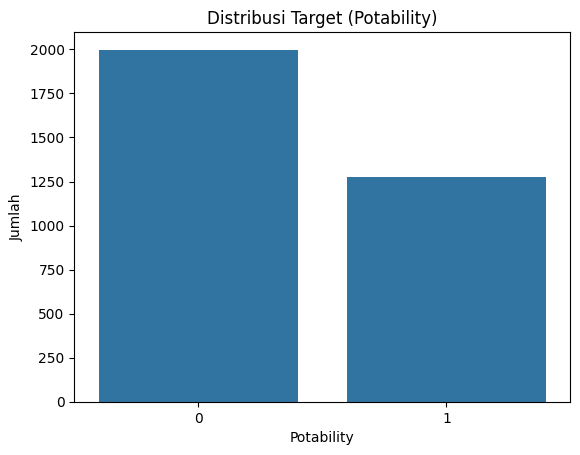

In [ ]:
# Memeriksa distribusi target
print("Distribusi Potability:")
print(y.value_counts())

# Visualisasi distribusi target
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribusi Target (Potability)")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengubah kembali ke DataFrame agar tetap kompatibel
X = pd.DataFrame(X_scaled, columns=X.columns)



In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data pelatihan:", X_train.shape[0])
print("Jumlah data pengujian:", X_test.shape[0])


Jumlah data pelatihan: 2620
Jumlah data pengujian: 656


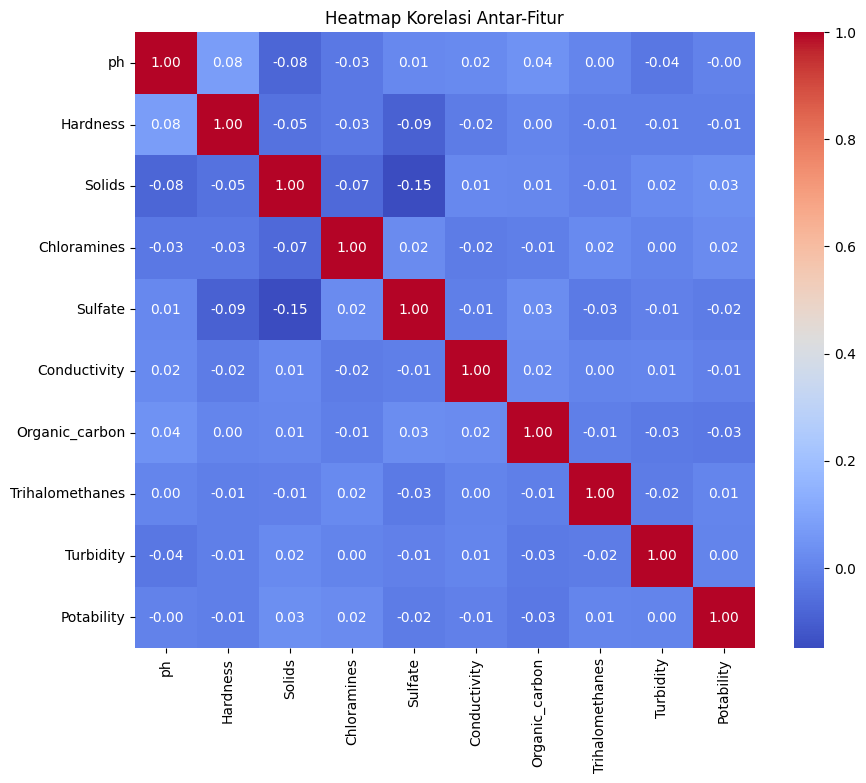

In [ ]:
# Menghitung korelasi antar-fitur
correlation_matrix = water_data.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar-Fitur")
plt.show()


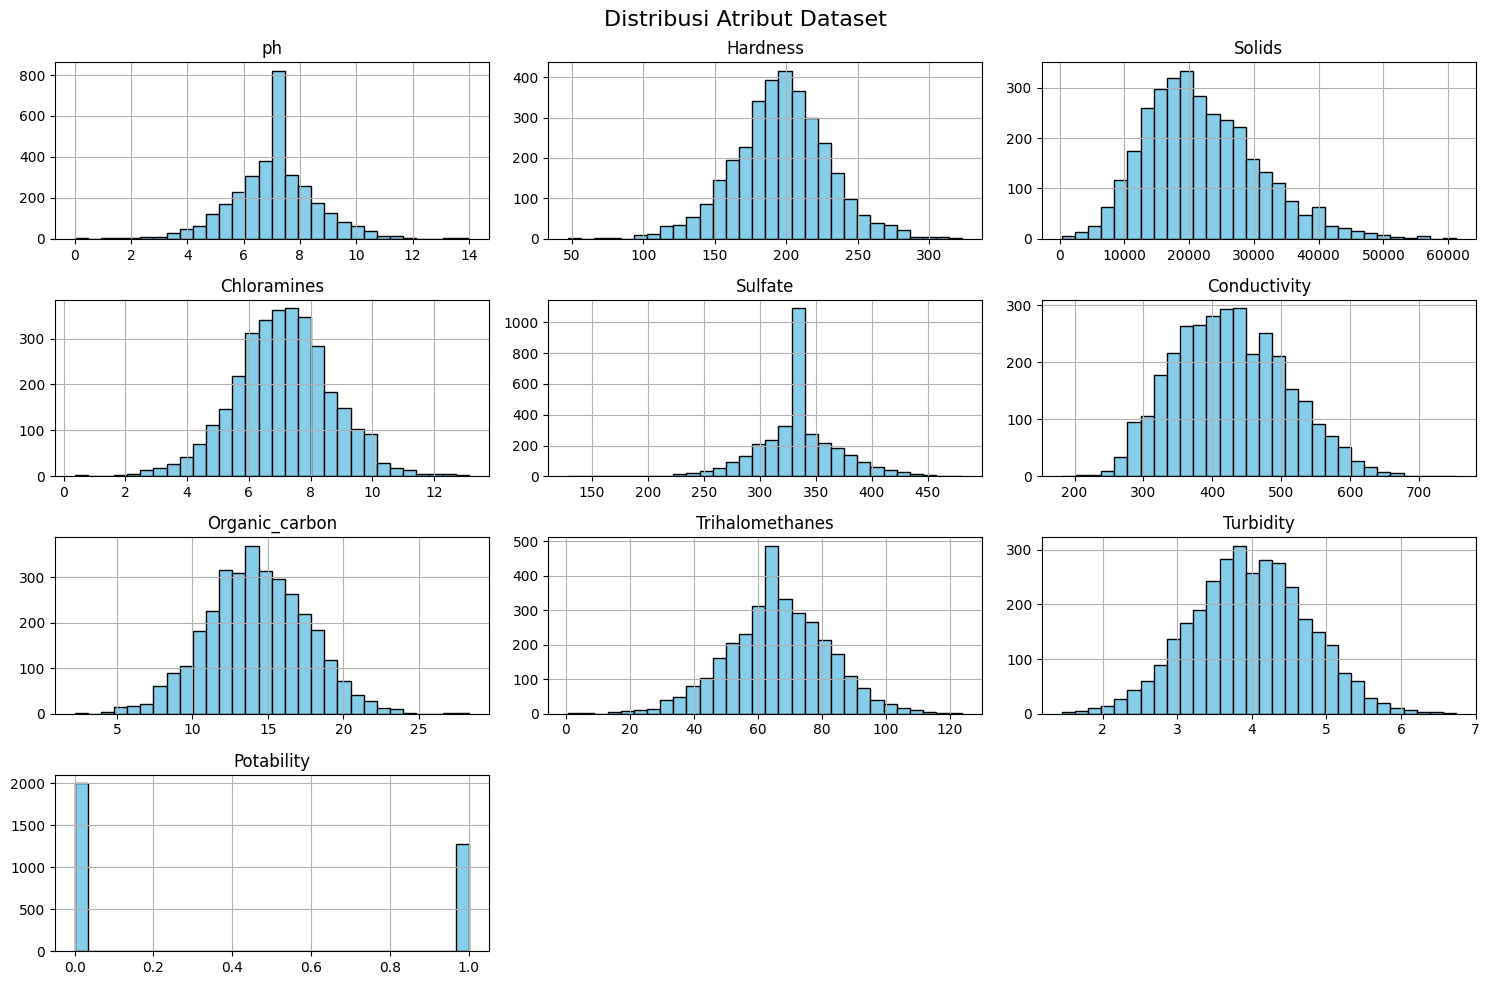

In [ ]:
# Membuat histogram untuk setiap kolom fitur
water_data.hist(figsize=(15, 10), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Atribut Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Memisahkan fitur dan target
X = water_data.drop(columns=["Potability"])
y = water_data["Potability"]

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 0.68


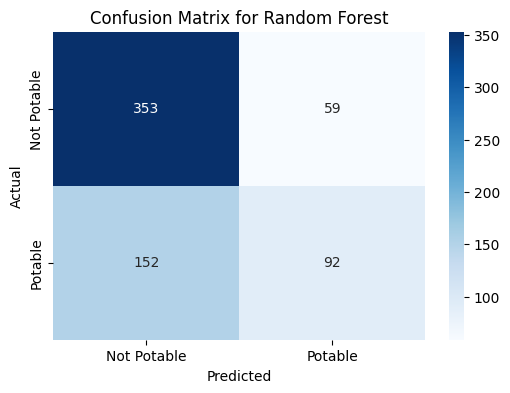

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656

Logistic Regression Accuracy: 0.63


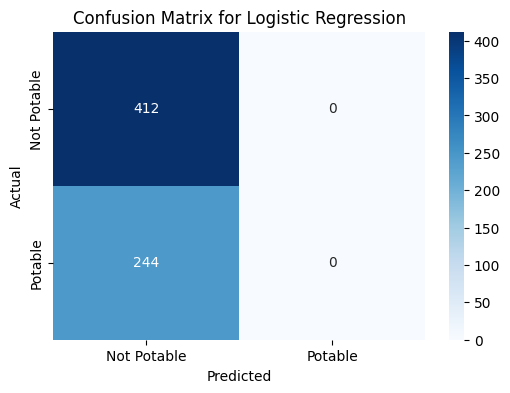

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Support Vector Machine Accuracy: 0.62


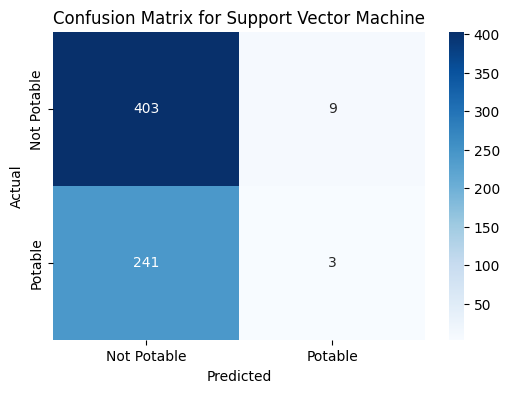

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.63      0.98      0.76       412
           1       0.25      0.01      0.02       244

    accuracy                           0.62       656
   macro avg       0.44      0.50      0.39       656
weighted avg       0.49      0.62      0.49       656



In [ ]:
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Melatih dan mengevaluasi model
for model_name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi akurasi
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report (Opsional)
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))


In [ ]:
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Evaluasi tanpa normalisasi
accuracies_no_normalization = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_no_normalization[model_name] = acc


In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluasi setelah normalisasi
accuracies_normalization = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies_normalization[model_name] = acc


                        Tanpa Normalisasi  Dengan Normalisasi
Random Forest                    0.678354            0.678354
Logistic Regression              0.628049            0.628049
Support Vector Machine           0.618902            0.628049


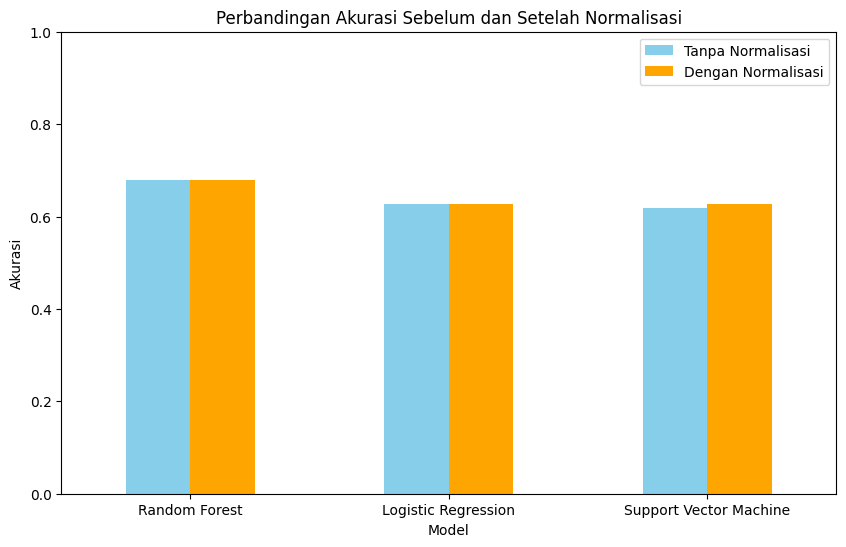

In [ ]:
# Membuat DataFrame untuk perbandingan akurasi
import pandas as pd

comparison = pd.DataFrame({
    "Tanpa Normalisasi": accuracies_no_normalization,
    "Dengan Normalisasi": accuracies_normalization
})

print(comparison)

# Visualisasi perbandingan akurasi
comparison.plot(kind='bar', figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Perbandingan Akurasi Sebelum dan Setelah Normalisasi")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()


# **KESIMPULAN**


1. Tingkat akurasi setiap algoritma

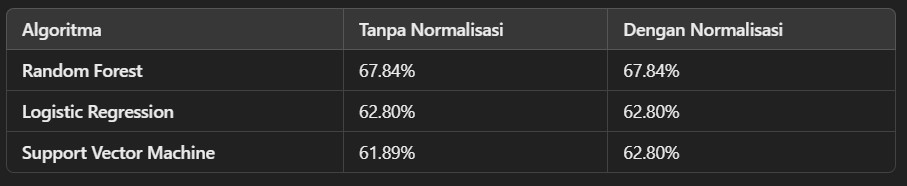
---


Random Forest memiliki akurasi tertinggi baik sebelum maupun setelah normalisasi(67,84%).
Logistic Regression dan Support Vector Machine (SVM) mengalami sedikit peningkatan akurasi setelah normalisasi, terutama SVM yang naik 1% setelah normalisasi.

2. Keunggulan dan Keterbatasan

***Random Forest:***

Keunggulan:

*   Secara alami menangani dataset dengan fitur yang berbeda-beda tanpa membutuhkan normalisasi.
*   Kuat terhadap data yang mengandung noise atau outlier.
*   Dapat menangkap hubungan non-linear dengan baik.

Keterbatasan:
* Bisa lebih lambat pada dataset besar karena melibatkan banyak pohon keputusan.
* Sulit untuk diinterpretasikan dibandingkan model linear.

***Logistic Regression:***

Keunggulan:
* Sederhana dan cepat untuk diterapkan.
* Mudah diinterpretasikan karena berbasis pada model linear.

Keterbatasan:
* Kurang efektif untuk dataset dengan hubungan non-linear antar-fitur.
* Tidak terlalu tahan terhadap outlier.

***Support Vector Machine (SVM):***

Keunggulan:
* Baik untuk dataset dengan dimensi tinggi.
* Setelah normalisasi, kinerjanya meningkat, menunjukkan sensitivitas terhadap skala fitur.
Keterbatasan:
* Memerlukan waktu komputasi yang lebih tinggi untuk dataset besar.
* Performa bergantung pada pemilihan kernel dan parameter.

3. Rekomendasi Algoritma yang Paling Efektif adalah Random Forest, dengan alasan:

* Random Forest memberikan akurasi tertinggi (67.84%) dibanding algoritma lainnya baik sebelum maupun setelah normalisasi.
* Tidak memerlukan normalisasi, sehingga lebih sederhana dalam preprocessing.
* Mampu menangani hubungan non-linear, yang sering ditemukan pada data dunia nyata seperti kualitas air.

Kesimpulan ini menunjukkan bahwa Random Forest adalah algoritma yang paling optimal untuk kasus ini, mengingat performanya yang konsisten di berbagai kondisi dan kemampuannya menangani data kompleks


